# 02- 💌NLP Sentiment Analysis Dating Apps Beoordelingen | 2017-2024 💌

In dit deel van deze notebook voeren we de volledige sentimentanalyse uit met de definitieve dataset: Dating App Reviews. Hierbij zal ik werken aan de EDA, het opschonen van data, exploratieve analyse, tekstverwerking en NLP.

# 📦Packages laden

In dit deel van de code worden alle benodigde bibliotheken en pakketten geïmporteerd om een NLP-sentimentanalyse op dating-app beoordelingen uit te voeren. Hier is een overzicht van de belangrijkste geïmporteerde pakketten:

- Algemene bibliotheken:Essentieel voor datamanipulatie, analyse en numerieke berekeningen. (pandas en numpy).

- Visualisatiebibliotheken:  Tools voor het maken van statische, dynamische en interactieve visualisaties om data visueel te analyseren.(matplotlib en seaborn).

- Tekstvoorbereiding en schoonmaken:Voor taken zoals opschonen, tokeniseren, stemming, lemmatiseren, taalherkenning en het uitbreiden van samentrekkingen in tekst.( re, nltk, textblob, langdetect, contractions)

- Sentimentanalyse:Voor het analyseren van sentiment in tekst en het visualiseren van woordfrequenties in een woordwolk. (vaderSentiment, wordcloud, sklearn). 



In [55]:
#import libraries
import pandas as pd
import numpy as np
import string
# Om grafieken te maken
import matplotlib.pyplot as plt
import seaborn as sns
# import libraries 'cleaning tekst'
import re 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from textblob import TextBlob
from joblib import Parallel, delayed
from langdetect import detect
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
import contractions
# import libraries sentimentanalyse
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#import libraries sentiment analyse
from wordcloud import WordCloud

# 🔋Dataset Laden

In [56]:
#Dataset 'dating app reviews India 2017-2023' laden 
dating_reviews = pd.read_csv("C:\\Users\\kaile\\OneDrive\\GitHub\\Phyton Projects\\NLP-Sentiment-Analysis-Dating-Apps\\all_reviews_combined.csv")
dating_reviews

,reviewId,userName,content,score,thumbsUpCount,Date,App
0,2ee284b2-8239-4434-b2e0-e3ed60a67896,A Google user,"Was banned without any reason, didn't break an...",1,0,2024-11-21,Tinder
1,6682e590-eb30-4ded-84af-8f8243b56442,A Google user,no funciona! Sencillamente no funciona,1,0,2024-11-21,Tinder
2,e6f5db1f-6364-4ade-9e50-a089777af6e1,A Google user,thank you so much,5,0,2024-11-21,Tinder
3,2cd17dae-6488-4bbe-86db-a2e6e19da3af,A Google user,"All fake profiles, mostly people, try to scam ...",5,0,2024-11-21,Tinder
4,9925c76e-0722-4890-8fa6-d62557fc4cfe,A Google user,Can't do anything before there is a match. Dis...,1,0,2024-11-21,Tinder
...,...,...,...,...,...,...,...
869356,ef1a89dd-cad6-4c85-9af0-333eb500702f,A Google user,Useless - I'm in the UK and it tells me i'm ov...,2,5,2017-07-11,Hinge
869357,edb91049-807f-41b3-a2f8-2b4e952089bd,A Google user,I can't get past the initial set up. It won't...,1,11,2017-07-11,Hinge
869358,98fdcb74-6fc9-4602-97b4-2a581972c850,A Google user,This is incredible! A quality dating app for A...,5,1,2017-07-11,Hinge
869359,05c33419-30bd-49a3-937a-3ad3bdbdf6fe,A Google user,"""Over Water"" ... Can't choose location.",2,8,2017-07-11,Hinge


# 📃Data omschrijven

De data is afkomstig uit Google Play Store. Elke beoordeling is gekoppeld aan een specifieke dating-app waarmee de gebruiker interactie had, samen met een bijbehorende beoordeling en, indien beschikbaar, een ThumbsUp-score om aan te geven of anderen het commentaar nuttig vonden of ermee instemden. De dataset is gestructureerd met de volgende kolommen:

- reviewId: is de unique identifier van elk beoordeling 
- userName: De naam van de gebruiker die de review heeft geschreven.
- content: De tekst van de review die de gebruiker heeft achtergelaten.
- score: De beoordeling gegeven door de gebruiker (waarschijnlijk op een schaal van 1-5).
- thumbsUpCount: Aantal "duimpjes omhoog" of likes die de review heeft gekregen.
- Date: De datum waarop de review is geplaatst.
- App: De specifieke dating-app die de gebruiker beoordeeld heeft (bijvoorbeeld Tinder of Hinge).


# 🔍Explanatory Data Analysis (EDA) Dating Apps Reviews

In [57]:
dating_reviews.head()

,reviewId,userName,content,score,thumbsUpCount,Date,App
0,2ee284b2-8239-4434-b2e0-e3ed60a67896,A Google user,"Was banned without any reason, didn't break an...",1,0,2024-11-21,Tinder
1,6682e590-eb30-4ded-84af-8f8243b56442,A Google user,no funciona! Sencillamente no funciona,1,0,2024-11-21,Tinder
2,e6f5db1f-6364-4ade-9e50-a089777af6e1,A Google user,thank you so much,5,0,2024-11-21,Tinder
3,2cd17dae-6488-4bbe-86db-a2e6e19da3af,A Google user,"All fake profiles, mostly people, try to scam ...",5,0,2024-11-21,Tinder
4,9925c76e-0722-4890-8fa6-d62557fc4cfe,A Google user,Can't do anything before there is a match. Dis...,1,0,2024-11-21,Tinder


In [58]:
dating_reviews.columns

Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount', 'Date',
       'App'],
      dtype='object')

In [59]:
dating_reviews.info()
print("shape of the dataset -->>",np.shape(dating_reviews)) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869361 entries, 0 to 869360
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   reviewId       869361 non-null  object
 1   userName       869361 non-null  object
 2   content        869361 non-null  object
 3   score          869361 non-null  int64 
 4   thumbsUpCount  869361 non-null  int64 
 5   Date           869361 non-null  object
 6   App            869361 non-null  object
dtypes: int64(2), object(5)
memory usage: 46.4+ MB
shape of the dataset -->> (869361, 7)


Opmerkingen over de datasetinformatie:

- We zien dat alleen de kolommen score en thumbsUpCount integers zijn, dus de dtype daarvan is correct.
- Voor de rest waren er geen wijzigingen nodig.

We gaan eerst de dtypes aanpassen naar de correcte datatypes:

- Converteer reviewId naar een string, omdat het niet alleen uit cijfers bestaat, maar ook uit letters. Het fungeert puur als identificator.
- Converteer Date naar een datetime-object.
- Een jaarkolom creëren om jaarlijkse trends te vergelijken.
- Zorg ervoor dat content en userName strings zijn.

Omdat we alle onnodige kolommen al hebben verwijderd, slaan we deze stap over. Alle kolommen die we nodig hebben voor de sentimentanalyse zijn al aanwezig.

In [60]:
# Convert reviewId, UserName and content to string type
dating_reviews['reviewId'] = dating_reviews['reviewId'].astype('string')
dating_reviews['userName'] = dating_reviews['userName'].astype('string')
dating_reviews['content'] = dating_reviews['content'].astype('string')

In [61]:
# Convert 'Date' to datetime
dating_reviews['Date'] = pd.to_datetime(dating_reviews['Date'], errors='coerce')

In [62]:
# Jaarkolom creëren 
dating_reviews['Year'] = dating_reviews['Date'].dt.year

In [63]:
dating_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869361 entries, 0 to 869360
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   reviewId       869361 non-null  string        
 1   userName       869361 non-null  string        
 2   content        869361 non-null  string        
 3   score          869361 non-null  int64         
 4   thumbsUpCount  869361 non-null  int64         
 5   Date           869361 non-null  datetime64[ns]
 6   App            869361 non-null  object        
 7   Year           869361 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(2), object(1), string(3)
memory usage: 49.7+ MB


In [64]:
# We gaan alleen de numerieke nummers dtypes van de describe tabel zien. 
dating_reviews.describe(include=[np.number])

,score,thumbsUpCount,Year
count,869361.000000,869361.000000,869361.000000
mean,2.817333,2.160565,2019.379589
std,1.758089,29.709020,2.863228
min,1.000000,0.000000,2013.000000
25%,1.000000,0.000000,2017.000000
50%,3.000000,0.000000,2019.000000
75%,5.000000,0.000000,2022.000000
max,5.000000,5461.000000,2024.000000


In [65]:
dating_reviews.tail()

,reviewId,userName,content,score,thumbsUpCount,Date,App,Year
869356,ef1a89dd-cad6-4c85-9af0-333eb500702f,A Google user,Useless - I'm in the UK and it tells me i'm ov...,2,5,2017-07-11,Hinge,2017
869357,edb91049-807f-41b3-a2f8-2b4e952089bd,A Google user,I can't get past the initial set up. It won't...,1,11,2017-07-11,Hinge,2017
869358,98fdcb74-6fc9-4602-97b4-2a581972c850,A Google user,This is incredible! A quality dating app for A...,5,1,2017-07-11,Hinge,2017
869359,05c33419-30bd-49a3-937a-3ad3bdbdf6fe,A Google user,"""Over Water"" ... Can't choose location.",2,8,2017-07-11,Hinge,2017
869360,de67b68f-25db-4bb2-846a-bda37db1355d,A Google user,"My entire town counts as ""over water"" and I ca...",2,15,2017-07-11,Hinge,2017


# 🧼Data opschonen Dating Apps Reviews

In deze stap zullen we de null warden vervangen en duplicates verwijderen. 

In [66]:
# Check non-null values for each column
print(dating_reviews.isnull().sum())

reviewId         0
userName         0
content          0
score            0
thumbsUpCount    0
Date             0
App              0
Year             0
dtype: int64


In de volgende stap worden duplicaten verwijderd uit zowel de definitieve dataset (dating_reviews). Dit voorkomt dat dezelfde beoordelingen meerdere keren in de gecombineerde dataset voorkomen.

In [67]:
# Controleer op duplicaten
print(dating_reviews.duplicated().sum())# Controleer op duplicaten

0


Daarna gaan we met de Exploratory Data analysis om de dataset in diep analyseren voordat we naar de (preprocessing) van de sentiment analyse gaan werken.

# 📈Data Visualisatie

Data visualisatie speelt een cruciale rol in het verkennen van gegevens en het communiceren van inzichten op een duidelijke en visueel aantrekkelijke manier. Het doel is om complexe data om te zetten in eenvoudig te interpreteren grafieken, waardoor verbanden en inzichten gemakkelijker kunnen worden begrepen.

We gaan enkele basis maar belangrijke inzichten uit deze data-analyse presenteren. We zullen visualisaties maken over:

Voor de Sentimentanalyse:

1. Score-analyse
Een staafdiagram dat de gemiddelde score toont die gebruikers aan elke app hebben gegeven.

2. Tijdelijke trends (jaarlijks)
Analyseer scores en duimpjes in de loop van de tijd (Datum). Zijn er trends of patronen? Bijvoorbeeld: Is het gebruikerssentiment in de loop van de tijd verbeterd of verslechterd?


3. Tijdelijke trends (maandelijks)
Deze analyse is gericht op het identificeren van de maand en het jaar met het hoogste gebruik van datingapps, gebaseerd op de dataset van 2013 tot 2024. Een lijngrafiek wordt gebruikt om het totale gebruik van apps per maand te visualiseren, met zowel seizoensgebonden als langetermijntrends.

Na de Sentimentanalyse:

4. Taalanalyse
Controleer de verhouding van reviews in verschillende talen. Dit kan worden gedaan met een cirkeldiagram of staafdiagram.

5. Sentimentanalyse
Visualiseer de sentimentverdeling over de verschillende apps.

# 1. Score Analysis

We gaan de average score per elk app: Tinder, Bumble, Hinge onderzoeken. 

In [68]:
# Group by app and calculate average score
avg_score = dating_reviews.groupby('App')['score'].mean()
avg_score

App
Bumble    2.619416
Hinge     2.813693
Tinder    2.867584
Name: score, dtype: float64

In [69]:
# Ascending values
avg_score = avg_score.sort_values(ascending=False)

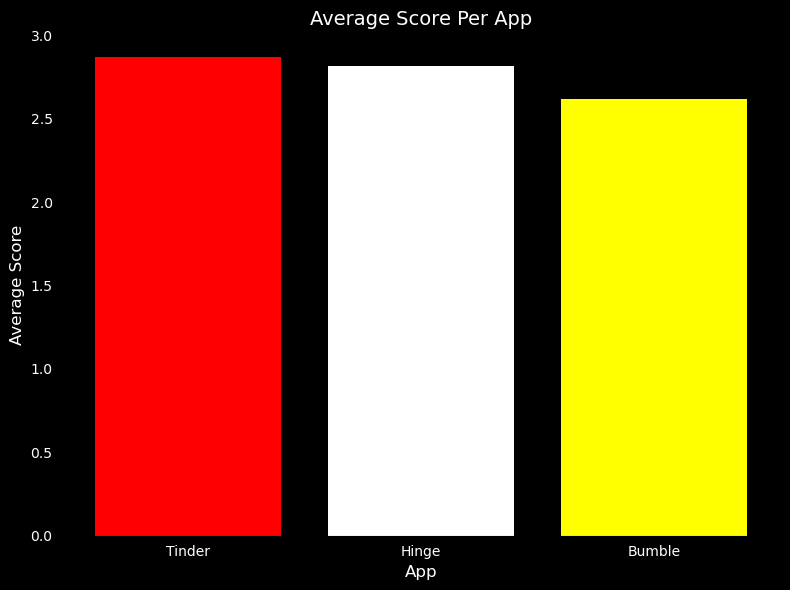

In [70]:
# Plot de grafiek
plt.figure(figsize=(8, 6), facecolor='black')
colors = ['red', 'white', 'yellow']  # Assign specific colors
bars = plt.bar(avg_score.index, avg_score.values, color=colors)

plt.title('Average Score Per App', color='white', fontsize=14)
plt.xlabel('App', color='white', fontsize=12)
plt.ylabel('Average Score', color='white', fontsize=12)
plt.xticks(color='white', fontsize=10)
plt.yticks(color='white', fontsize=10)
plt.gca().set_facecolor('black')

plt.tight_layout()
plt.show()


Zoals je kunt zien, heeft Tinder een hogere score dan de andere apps, wat wijst op een betere prestatie volgens de gebruikers. Echter, in de sentimentanalyse gaan we dieper in op de reviews om te onderzoeken of deze scores overeenkomen met de feedback van de gebruikers.

# 2. Tijdelijke Trends (jaarlijks)

Analyseer de scores en het aantal duimpjes omhoog in de loop der tijd (Datum). Zijn er trends of patronen?
Is het gebruikerssentiment in de loop der tijd verbeterd of verslechterd?

In [71]:
# Group by year and calculate average score
yearly_scores = dating_reviews.groupby('Year')['score'].mean().reset_index()
print(yearly_scores)

    Year     score
0   2013  3.764684
1   2014  3.446468
2   2015  2.887466
3   2016  2.942045
4   2017  3.219640
5   2018  3.355210
6   2019  3.261796
7   2020  2.810506
8   2021  2.402114
9   2022  2.312267
10  2023  2.204974
11  2024  2.227120


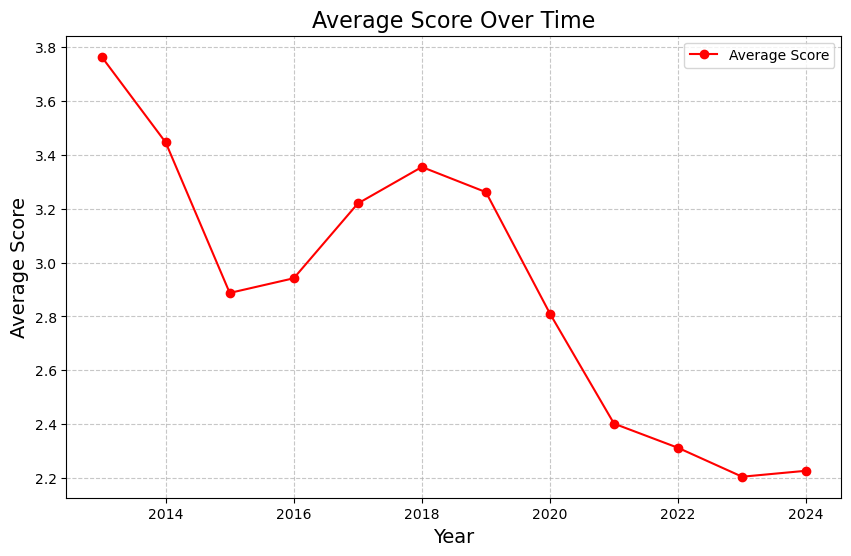

In [72]:
# Assuming yearly_scores is a DataFrame with 'Year' and 'score' columns
plt.figure(figsize=(10, 6))
plt.plot(yearly_scores['Year'], yearly_scores['score'], marker='o', color='red', label='Average Score')
plt.title('Average Score Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Score', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

Uit de grafiek kunnen we zien dat het gebruikerssentiment de afgelopen 11 jaar aanzienlijk is afgenomen. Tussen 2013 en 2016 zien we een daling, mogelijk omdat datingapps toen nog nieuw waren en er waarschijnlijk veel bugs of verouderde functionaliteit waren. Tussen 2016 en 2018 was er een significante verbetering in de beoordelingen, wat erop wijst dat er in die periode grote updates zijn doorgevoerd en dat datingapps populairder werden, mede door veel marketingcampagnes en een toename van het aantal gebruikers. Deze jaren vormden het hoogtepunt van de datingapps.

Na 2018 daalden de scores opnieuw, waarschijnlijk vanwege technische problemen, bugs, of een toename van abonnementskosten, wat betekent dat gebruikers moesten betalen om speciale functies te ontgrendelen. Mogelijk speelde ook een verminderde kwaliteit van de matches een rol. Maar dit zijn mijn aannames. We gaan elke beoordeling analyseren in de volgende stap (sentiment analyse) om een duidelijker en preciezer beeld te krijgen van de redenen achter de dalende scores bij datingapps.

# 3. Tijdelijke Trends (maandelijks)

Deze analyse is gericht op het identificeren van de maand en het jaar met het hoogste gebruik van datingapps, gebaseerd op de dataset van 2013 tot 2024. Een lijngrafiek wordt gebruikt om het totale gebruik van apps per maand te visualiseren, met zowel seizoensgebonden als langetermijntrends.

In [73]:
quick_recap=dating_reviews.groupby(['Date'])['Date'].count()

In [74]:
print(quick_recap)

Date
2013-07-15      8
2013-07-16     73
2013-07-17    103
2013-07-18     50
2013-07-19     24
             ... 
2024-11-19    194
2024-11-20    208
2024-11-21    226
2024-11-22     87
2024-11-23     91
Name: Date, Length: 4150, dtype: int64


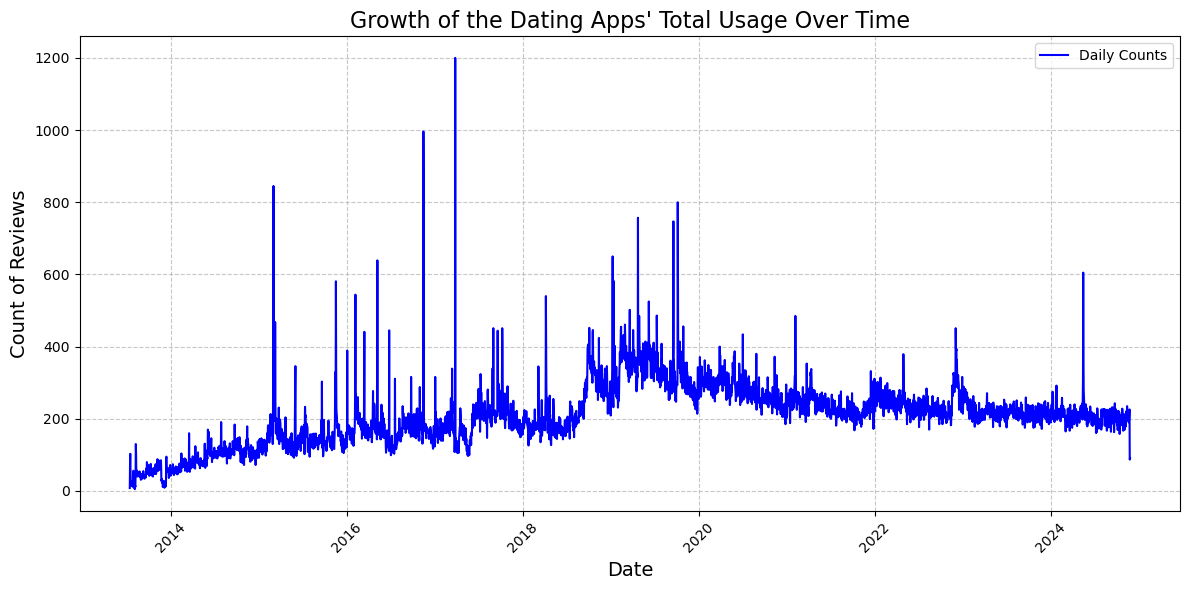

In [75]:
plt.figure(figsize=(12, 6))
plt.plot(quick_recap.index, quick_recap.values, color='blue', label="Daily Counts")
plt.title("Growth of the Dating Apps' Total Usage Over Time", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count of Reviews', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Uit de lijngrafiek blijkt dat de hoogste waarde in maart 2017 ligt, met ongeveer 1200 gebruikers. De laagste waarde werd geregistreerd in augustus 2013, met slechts acht gebruikers. Daarnaast kunnen we een cirkeldiagram maken om de verdeling van de apps in de dataset te visualiseren, zodat we kunnen bepalen welke app het meest werd gebruikt.

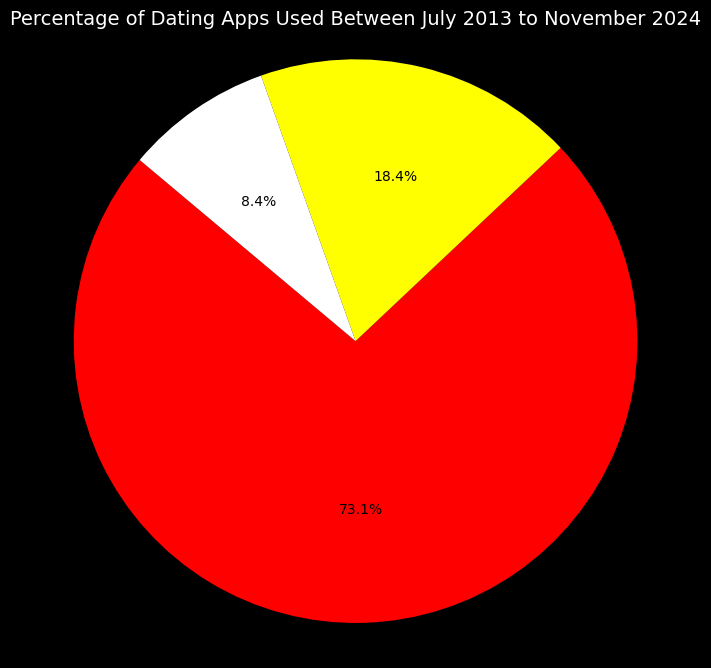

In [76]:
# Generate app counts
app_counts = dating_reviews['App'].value_counts()

# Pie chart with a black background
plt.figure(figsize=(8, 8), facecolor='black')
plt.pie(
    app_counts.values,
    labels=app_counts.index,
    autopct='%1.1f%%',
    colors=['red', 'yellow', 'white'],
    startangle=140
)
plt.title(
    "Percentage of Dating Apps Used Between July 2013 to November 2024",
    fontsize=14,
    color='white'
)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.
plt.gca().set_facecolor('black')  # Set the chart area background to black
plt.show()

Uit het bovenstaande cirkeldiagram weten we dat 73.1% van de gebruikers Tinder gebruikt, 18,4% Bumble en 8,44% Hinge. Hieruit kunnen we concluderen dat er meer reviews over Tinder zijn dan over de andere apps. Op dit moment kunnen we nog niet zeggen of de reviews voor deze app positief, negatief of neutraal zijn. Later, na het uitvoeren van de Sentimentanalyse, kunnen we met zekerheid vaststellen of de opmerkingen over deze platforms zichtbare en diepgaande inzichten bieden voor onze data-analyse.

Na deze visualisaties gaan we de reviews analyseren om de drie deelvragen te beantwoorden die we aan het begin van deze analyse hebben vastgesteld.

# 👁️Sentiment Analysis

We gaan NLP (Natural Language Processing) gebruiken om een Sentimentanalyse uit te voeren op de 'content'-kolom van de dataset dating_reviews. Dit doen we om de tekst op te schonen en elke review te classificeren in een specifieke emotiecategorie (positief/neutraal/negatief). Op basis van deze nieuwe informatie zullen we de gebruikerstevredenheid en betrokkenheid bij de app voorspellen.

# Preprocessing

We gaan eerst deze stappen volgen:

1. Tekstanalyse: 
Identificeer en verwijder overbodige woorden (stopwoorden), speciale tekens, en normaliseer de tekst door bijvoorbeeld lemmatization of stemming toe te passen.

2. World of Clouds: 
Maak een Word Cloud om te visualiseren welke woorden het meest worden gebruikt in de reviews. Dit geeft een snel overzicht van veelvoorkomende onderwerpen.

3. Categorized Sentiment by Text: 
Classificeer de tekst op basis van sentiment (positief, neutraal, negatief) en voeg deze classificaties toe aan de dataset voor verdere analyse.

# 💬Tekstanalyse

In deze stap gaan we de tekst opschonen met behulp van de volgende technieken, zodat we de Sentimentanalyse nauwkeuriger kunnen uitvoeren:

- Omzetten van tekst naar kleine letters voor consistentie.
- Verwijderen van onnodige leestekens, speciale tekens en emoji's.
- Stopwoorden verwijderen (bijvoorbeeld: "en," "de," "is") die niet bijdragen aan de sentimentanalyse.
- Woorden lemmatiseren of terugbrengen naar de stamvorm (bijvoorbeeld: "loopt" → "loop").

Door deze stappen uit te voeren, zorgen we voor een beter opgeschoonde tekst waarmee de sentimentclassificatie vollediger en nauwkeuriger kan worden uitgevoerd.

Eerst we gaan der eerste 20 rijen kijken om de volledige tekst te zien voor dat we gaan de functie: 'display.max_colwidth' gebruiken om de volledig tekst te zien.

In [77]:
# Set pandas to display full content in columns
pd.set_option('display.max_colwidth', None)

In [78]:
#Step 1: Display the column where text is displayed in our case the 'Review'column
# Display only the 'Review' column
dating_reviews['content']

0                                                                             Was banned without any reason, didn't break any of their therms of use, tried to appeal with no responde whatsoever.
1                                                                                                                                                           no funciona! Sencillamente no funciona
2                                                                                                                                                                                thank you so much
3                                                                                                         All fake profiles, mostly people, try to scam with you and use this app for blackmailing
4                                                                                     Can't do anything before there is a match. Distance calculation is incorrect. A huge waste of time and money
                         

# Lower casing : omzetten van tekst naar kleine letters

We zetten de tekst om naar kleine letters door gebruik te maken van de functie .str.lower() op de content-kolom. Hiermee wordt alle tekst in een uniforme vorm gebracht, zodat woorden zoals "Hallo" en "hallo" als dezelfde entiteit worden herkend.

In [79]:
# Convert text to lowercase
dating_reviews['content'] = dating_reviews['content'].str.lower()
print(dating_reviews['content'].head()) 

0    was banned without any reason, didn't break any of their therms of use, tried to appeal with no responde whatsoever.
1                                                                                  no funciona! sencillamente no funciona
2                                                                                                       thank you so much
3                                all fake profiles, mostly people, try to scam with you and use this app for blackmailing
4            can't do anything before there is a match. distance calculation is incorrect. a huge waste of time and money
Name: content, dtype: string


# Onnodige leestekens verwijderen

Deze stap richt zich op het opschonen van de tekst in de content-kolom door onnodige elementen te verwijderen, zoals leestekens, speciale tekens, nummers en emoji's . Dit is belangrijk om de tekst eenvoudiger en consistenter te maken voor verdere analyse. 

In [80]:
# Function to remove punctuation, special characters, and emojis
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)      # Remove numbers
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Remove emojis and non-ASCII characters
    return text

# Apply the function to the 'content' column
dating_reviews['content'] = dating_reviews['content'].apply(clean_text)
print(dating_reviews['content'])

0                                                                         was banned without any reason didnt break any of their therms of use tried to appeal with no responde whatsoever
1                                                                                                                                                    no funciona sencillamente no funciona
2                                                                                                                                                                        thank you so much
3                                                                                                   all fake profiles mostly people try to scam with you and use this app for blackmailing
4                                                                                cant do anything before there is a match distance calculation is incorrect a huge waste of time and money
                                                                 

Wat er is in deze stap gebeurt? 

- Leestekens verwijderen: Verwijdert leestekens zoals punten en komma's (r'[^\w\s]').
- Cijfers verwijderen: Verwijdert alle cijfers (r'\d+').
- Emoji's en niet-ASCII-tekens verwijderen: Verwijdert emoji's en speciale tekens (r'[^\x00-\x7F]+').
- De functie apply(clean_text) wordt toegepast op de content-kolom om de tekst op te schonen.

Resultaat: De teksten in de content-kolom zijn vrij van onnodige tekens en klaar voor verdere analyse.

Voorbeeld:

Voor: "This is great!!! 😊😊😊 #amazing 123"
Na: "this is great amazing"


# Stopwoorden verwijderen

In deze stap verwijderen we veelvoorkomende woorden zoals "the", "is" en "and" uit de tekst door gebruik te maken van een lijst met stopwoorden. Dit wordt gedaan om de focus te leggen op de betekenisvolle woorden in de tekst, wat helpt bij een betere analyse en verwerking.

In [81]:
stop_words = stopwords.words ('english')

In [82]:
len(stop_words)

179

In [83]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [84]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = word_tokenize(text)
    return ' '.join([word for word in words if word not in stop_words])

dating_reviews['content'] = dating_reviews['content'].apply(remove_stopwords)

print(dating_reviews['content'].head())

0    banned without reason didnt break therms use tried appeal responde whatsoever
1                                                  funciona sencillamente funciona
2                                                                       thank much
3                        fake profiles mostly people try scam use app blackmailing
4         cant anything match distance calculation incorrect huge waste time money
Name: content, dtype: object


In deze stap hebben we een functie gemaakt om stopwoorden te verwijderen uit de tekst. Hierbij worden de woorden in de tekst gesplitst, stopwoorden eruit gefilterd met behulp van een stopwoordenlijst, en de resterende woorden weer samengevoegd tot een schone tekst. Deze functie wordt vervolgens toegepast op de content-kolom van de dataset.

# Andere Stopwoorden verwijderen

In deze stap hebben we een aangepaste lijst met veelvoorkomende woorden (custom_stopwords) samengesteld die specifiek zijn voor de dataset, zoals "app", "people", en "tinder".

In [85]:
pd.Series( " ".join(dating_reviews['content']).split()).value_counts()[:50]

app         314661
good        100808
people       96636
get          82047
tinder       79723
like         78613
dont         74195
even         63887
cant         63844
account      57407
time         57385
matches      55746
great        50930
use          48864
im           48599
banned       46756
pay          45665
money        45624
one          44446
match        41801
got          39700
dating       39699
nice         38326
fake         35771
see          35652
profile      34060
ive          33422
profiles     33146
likes        33101
new          32578
still        30412
wont         29187
never        28722
many         28147
way          27964
would        27837
reason       27797
doesnt       27778
really       27743
want         27500
back         27211
log          26731
love         25942
message      24927
waste        24826
make         24799
better       24600
work         23919
facebook     23383
nothing      23153
Name: count, dtype: int64

In [86]:
custom_stopwords = ['app', 'people', 'get', 'tinder', 'even', 'im', 'one', 'got', 'see', 'ive',  'new', 'still', 'many', 'way', 'back', 'facebook', 'will', 'match']

In [87]:
len(custom_stopwords)

18

In [88]:
#Remove custom stopwords
dating_reviews['content'] = dating_reviews['content'].apply(
    lambda x: ' '.join(word for word in x.split() if word not in custom_stopwords))
print(dating_reviews['content'].head())

0    banned without reason didnt break therms use tried appeal responde whatsoever
1                                                  funciona sencillamente funciona
2                                                                       thank much
3                                   fake profiles mostly try scam use blackmailing
4               cant anything distance calculation incorrect huge waste time money
Name: content, dtype: object


In [89]:
pd.Series( " ".join(dating_reviews['content']).split()).value_counts()[:50]

good            100808
like             78613
dont             74195
cant             63844
account          57407
time             57385
matches          55746
great            50930
use              48864
banned           46756
pay              45665
money            45624
dating           39699
nice             38326
fake             35771
profile          34060
profiles         33146
likes            33101
wont             29187
never            28722
would            27837
reason           27797
doesnt           27778
really           27743
want             27500
log              26731
love             25942
message          24927
waste            24826
make             24799
better           24600
work             23919
nothing          23153
apps             22587
someone          22486
subscription     22351
find             21892
messages         21842
also             21580
please           21458
women            21418
know             20932
free             20749
let        

Vervolgens hebben we een functie toegepast op de content-kolom om deze woorden uit de tekst te verwijderen. Hiermee wordt de dataset verder opgeschoond door irrelevante of oververtegenwoordigde woorden te filteren. Tot slot bekijken we opnieuw de meest voorkomende woorden om de impact van het opschonen te evalueren.

# Woorden lemmatiseren

Deze stap richt zich op het terugbrengen van woorden naar hun basisvorm (lemma) om consistentie te waarborgen in de tekstverwerking. Lemmatisatie zorgt ervoor dat woorden met dezelfde betekenis, maar verschillende vormen (zoals werkwoordsvormen), worden teruggebracht naar hun stamvorm.

In [90]:
# Lemmatize the words
dating_reviews['content'] = dating_reviews['content'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)
print(dating_reviews['content'].head())


0    banned without reason didnt break therm use tried appeal responde whatsoever
1                                                 funciona sencillamente funciona
2                                                                      thank much
3                                   fake profile mostly try scam use blackmailing
4              cant anything distance calculation incorrect huge waste time money
Name: content, dtype: object


De code voert lemmatisatie uit op de tekst in de content-kolom. Hierbij worden woorden teruggebracht naar hun basisvorm (bijvoorbeeld "running" → "run") met behulp van de WordNetLemmatizer. Dit zorgt voor consistentie en vermindert variaties in woordvormen, wat de tekst beter geschikt maakt voor verdere analyse.

# Spaties verwijderen

In deze stap worden overbodige spaties uit de tekst verwijderd. Dit omvat het weghalen van leidende en volgende spaties (aan het begin en einde van de tekst) en het vervangen van meerdere opeenvolgende spaties binnen de tekst door een enkele spatie. Dit zorgt voor een nettere en uniformere tekstweergave in de dataset.

In [91]:
# Remove extra spaces
dating_reviews['content'] = dating_reviews['content'].str.strip()  # Remove leading/trailing spaces
dating_reviews['content'] = dating_reviews['content'].str.replace(r'\s+', ' ', regex=True)  # Replace multiple spaces

# Check the results
print(dating_reviews['content'].head())


0    banned without reason didnt break therm use tried appeal responde whatsoever
1                                                 funciona sencillamente funciona
2                                                                      thank much
3                                   fake profile mostly try scam use blackmailing
4              cant anything distance calculation incorrect huge waste time money
Name: content, dtype: object


# Rijen verwijderen

In deze stap worden rijen verwijderd waar de tekst in de content-kolom leeg is of alleen uit spaties bestaat. Dit zorgt ervoor dat de dataset alleen relevante en bruikbare gegevens bevat. Daarna wordt het aantal overgebleven rijen gecontroleerd om te zien hoeveel data er nog beschikbaar is voor analyse.

In [92]:
# Drop rows with empty or whitespace-only content
dating_reviews = dating_reviews[dating_reviews['content'].str.strip() != '']
# Check the number of remaining rows
print(len(dating_reviews))


858365


# Contracties in de tekst uitbreiden

In deze stap worden contracties (afkortingen) in de tekst uitgebreid. Dit betekent dat woorden zoals "don't" worden omgezet naar "do not" en "I'm" naar "I am". Het uitbreiden van contracties zorgt ervoor dat de tekst uniformer en eenvoudiger te analyseren is.

In [93]:
# Expand contractions in the text column
dating_reviews.loc[:, 'content'] = dating_reviews['content'].apply(lambda x: contractions.fix(x))

# Check the results
print(dating_reviews['content'].head())


0    banned without reason did not break therm use tried appeal responde whatsoever
1                                                   funciona sencillamente funciona
2                                                                        thank much
3                                     fake profile mostly try scam use blackmailing
4              cannot anything distance calculation incorrect huge waste time money
Name: content, dtype: object


In deze stap wordt de tekst in de content-kolom van de dating_reviews-dataset aangepast door alle contracties (afkortingen) uit te breiden naar hun volledige vorm. De functie apply() wordt gebruikt om een bewerking op elke tekstregel in de kolom toe te passen. De functie contractions.fix() binnen de lambda zorgt ervoor dat contracties zoals "can't" worden omgezet naar "cannot" en "I'm" naar "I am". Het resultaat wordt opgeslagen in dezelfde kolom, en met head() worden de eerste paar rijen weergegeven om te controleren of de bewerking correct is uitgevoerd.

Na het tekstopschoningsproces keren we terug naar de standaardopties om de tekst in een normale vorm weer te geven.

In [94]:
# Restore default Pandas options
pd.reset_option('display.max_colwidth')

En daarna slaan we de nieuwe versie van de dataset op om de volgende stap uit te voeren: het categoriseren van sentiment.

In [95]:
dating_reviews_cleaned = dating_reviews
# Save the cleaned DataFrame to a CSV file
dating_reviews_cleaned.to_csv('cleaned_dating_reviews.csv', index=False)

print("Cleaned data has been saved as 'cleaned_dating_reviews.csv'.")


Cleaned data has been saved as 'cleaned_dating_reviews.csv'.


# Conclusie van tekstopschonen

De eindconclusie van het tekstopschoningsproces is dat we verschillende stappen hebben gebruikt om de tekst te verbeteren. Echter, er zijn nog steeds woorden die verder verbeterd kunnen worden, of onnodige woorden, zoals reviews in verschillende talen, die verwijderd kunnen worden. Tijdens het verwerkingsproces zien we echter dat na het categoriseren van sentiment deze reviews als neutraal worden geclassificeerd. Dit heeft dus geen grote impact op het tekstopschoningsproces

# Processing

# Categoriseren van Sentiment

Voor de laatste deel van de notebook we zullen onze opgeschoond dataset gebruiken: dating_reviews_cleaned

In [96]:
# Nieuwe Dataset laden 
dating_reviews_cleaned = pd.read_csv("C:\\Users\\kaile\\OneDrive\\GitHub\\Phyton Projects\\NLP-Sentiment-Analysis-Dating-Apps\\cleaned_dating_reviews.csv")
dating_reviews_cleaned

,reviewId,userName,content,score,thumbsUpCount,Date,App,Year
0,2ee284b2-8239-4434-b2e0-e3ed60a67896,A Google user,banned without reason did not break therm use ...,1,0,2024-11-21,Tinder,2024
1,6682e590-eb30-4ded-84af-8f8243b56442,A Google user,funciona sencillamente funciona,1,0,2024-11-21,Tinder,2024
2,e6f5db1f-6364-4ade-9e50-a089777af6e1,A Google user,thank much,5,0,2024-11-21,Tinder,2024
3,2cd17dae-6488-4bbe-86db-a2e6e19da3af,A Google user,fake profile mostly try scam use blackmailing,5,0,2024-11-21,Tinder,2024
4,9925c76e-0722-4890-8fa6-d62557fc4cfe,A Google user,cannot anything distance calculation incorrect...,1,0,2024-11-21,Tinder,2024
...,...,...,...,...,...,...,...,...
858360,ef1a89dd-cad6-4c85-9af0-333eb500702f,A Google user,useless uk tell water will not let running lit...,2,5,2017-07-11,Hinge,2017
858361,edb91049-807f-41b3-a2f8-2b4e952089bd,A Google user,cannot past initial set will not set neighborh...,1,11,2017-07-11,Hinge,2017
858362,98fdcb74-6fc9-4602-97b4-2a581972c850,A Google user,incredible quality dating android boyfriend wya,5,1,2017-07-11,Hinge,2017
858363,05c33419-30bd-49a3-937a-3ad3bdbdf6fe,A Google user,water cannot choose location,2,8,2017-07-11,Hinge,2017


Voordat we de sentimentanalyse toepassen op de kolom met reviews ('content'), analyseren we eerst een enkele review. Wat we hier zien, is dat de VADER-library vier scores berekent:

- neg: De negatieve score van de tekst.
- neu: De neutrale score van de tekst.
- pos: De positieve score van de tekst.
- compound: De samengestelde score die een algemene sentimentwaarde geeft. Een negatieve compound-score duidt op een overwegend negatief sentiment.

In [97]:
analyzer = SentimentIntensityAnalyzer()

score = score = analyzer.polarity_scores(" banned without reason didnt break therm use tried appeal responde whatsoever")
score

{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'compound': -0.4588}

In een andere review wordt geanalyseerd met dezelfde methode. In dit geval geeft de compound-score een positief sentiment weer, wat betekent dat de tekst voornamelijk positief wordt beoordeeld.

In [98]:
score = analyzer.polarity_scores("thank much")
score

{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}

In deze stap wordt de VADER-sentimentanalyse toegepast van de rest van de andere reviews. Eerst initialiseert de code de VADER Sentiment Analyzer. Vervolgens wordt een functie gedefinieerd om het sentiment van een review te classificeren als positief, neutraal of negatief op basis van de compound-score, een totale sentimentscore. Reviews met een score boven 0.1 worden als positief beschouwd, onder -0.1 als negatief, en daartussen als neutraal. Hiermee wordt het sentiment van de tekst automatisch beoordeeld.

In [99]:
# Initialize VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to classify sentiment using VADER
def vader_sentiment_analysis(review):
    scores = analyzer.polarity_scores(review)
    compound = scores['compound'] 
    if compound >= 0.05:
        return 1  # Positive
    elif compound <= -0.05:
        return -1  # Negative
    else:
        return 0  # Neutral


In deze stap worden ontbrekende waarden (NaN) in de content-kolom vervangen door lege strings en wordt ervoor gezorgd dat alle waarden als strings zijn opgeslagen. Vervolgens wordt de VADER-sentimentanalyse opnieuw toegepast op de opgeschoonde tekst, waarbij aan elke review een sentimentcategorie wordt toegekend (positief, neutraal of negatief). Tot slot worden de eerste paar rijen van de bijgewerkte dataset weergegeven om het resultaat te controleren.

In [100]:
# Replace NaN values and ensure all content is a string
dating_reviews_cleaned['content'] = dating_reviews_cleaned['content'].fillna('').astype(str)

# Re-apply VADER sentiment analysis
dating_reviews_cleaned['Sentiment_score'] = dating_reviews_cleaned['content'].apply(vader_sentiment_analysis)

# Display the first few rows
dating_reviews_cleaned


,reviewId,userName,content,score,thumbsUpCount,Date,App,Year,Sentiment_score
0,2ee284b2-8239-4434-b2e0-e3ed60a67896,A Google user,banned without reason did not break therm use ...,1,0,2024-11-21,Tinder,2024,-1
1,6682e590-eb30-4ded-84af-8f8243b56442,A Google user,funciona sencillamente funciona,1,0,2024-11-21,Tinder,2024,0
2,e6f5db1f-6364-4ade-9e50-a089777af6e1,A Google user,thank much,5,0,2024-11-21,Tinder,2024,1
3,2cd17dae-6488-4bbe-86db-a2e6e19da3af,A Google user,fake profile mostly try scam use blackmailing,5,0,2024-11-21,Tinder,2024,-1
4,9925c76e-0722-4890-8fa6-d62557fc4cfe,A Google user,cannot anything distance calculation incorrect...,1,0,2024-11-21,Tinder,2024,-1
...,...,...,...,...,...,...,...,...,...
858360,ef1a89dd-cad6-4c85-9af0-333eb500702f,A Google user,useless uk tell water will not let running lit...,2,5,2017-07-11,Hinge,2017,-1
858361,edb91049-807f-41b3-a2f8-2b4e952089bd,A Google user,cannot past initial set will not set neighborh...,1,11,2017-07-11,Hinge,2017,0
858362,98fdcb74-6fc9-4602-97b4-2a581972c850,A Google user,incredible quality dating android boyfriend wya,5,1,2017-07-11,Hinge,2017,0
858363,05c33419-30bd-49a3-937a-3ad3bdbdf6fe,A Google user,water cannot choose location,2,8,2017-07-11,Hinge,2017,0


De uitvoer toont de verdeling van de sentimentcategorieën in de dataset na het toepassen van de VADER-sentimentanalyse.

In [101]:
print(dating_reviews_cleaned['Sentiment_score'].value_counts())

Sentiment_score
 1    447024
-1    241470
 0    169871
Name: count, dtype: int64


De tabel geeft een overzicht van het aantal positieve, negatieve en neutrale reviews in de dataset. Op basis van de getallen kun je concluderen dat:

- 1 (positief): 447.024 reviews zijn als positief geclassificeerd.
- -1 (negatief): 241.470 reviews zijn als negatief geclassificeerd.
- 0 (neutraal): 169.871 reviews zijn als neutraal geclassificeerd.

Dus, De dataset bevat overwegend positieve reviews, terwijl neutrale beoordelingen het minst voorkomen.

In [102]:
# Map numeric sentiment values back to string labels
label_mapping = {1: 'Positive', 0: 'Neutral', -1: 'Negative'}
dating_reviews_cleaned['Sentiment_label'] = dating_reviews_cleaned['Sentiment_score'].map(label_mapping)

In deze stap worden de numerieke sentimentwaarden (1, 0, -1) omgezet naar begrijpelijke labels: 'Positive', 'Neutral', en 'Negative'. Dit wordt gedaan door een mapping toe te passen op de Sentiment-kolom en de resultaten op te slaan in een nieuwe kolom genaamd Sentiment_label. Vervolgens wordt de dataset weergegeven met de nieuwe kolom om te controleren of de conversie correct is uitgevoerd. Daarna we gaan de nieuwe dataset laden om de niewe omzettingen controleren: 

In [103]:
dating_reviews_cleaned.head()

,reviewId,userName,content,score,thumbsUpCount,Date,App,Year,Sentiment_score,Sentiment_label
0,2ee284b2-8239-4434-b2e0-e3ed60a67896,A Google user,banned without reason did not break therm use ...,1,0,2024-11-21,Tinder,2024,-1,Negative
1,6682e590-eb30-4ded-84af-8f8243b56442,A Google user,funciona sencillamente funciona,1,0,2024-11-21,Tinder,2024,0,Neutral
2,e6f5db1f-6364-4ade-9e50-a089777af6e1,A Google user,thank much,5,0,2024-11-21,Tinder,2024,1,Positive
3,2cd17dae-6488-4bbe-86db-a2e6e19da3af,A Google user,fake profile mostly try scam use blackmailing,5,0,2024-11-21,Tinder,2024,-1,Negative
4,9925c76e-0722-4890-8fa6-d62557fc4cfe,A Google user,cannot anything distance calculation incorrect...,1,0,2024-11-21,Tinder,2024,-1,Negative


# Sentimenten verdelen

Deze grafiek toont de verdeling van sentimenten in de dataset dating_reviews_cleaned. Er zijn drie categorieën sentimenten:

- Positive (groen): Reviews die positief zijn beoordeeld.
- Negative (rood): Reviews die negatief zijn beoordeeld.
- Neutral (orange): Reviews die neutraal zijn beoordeeld.

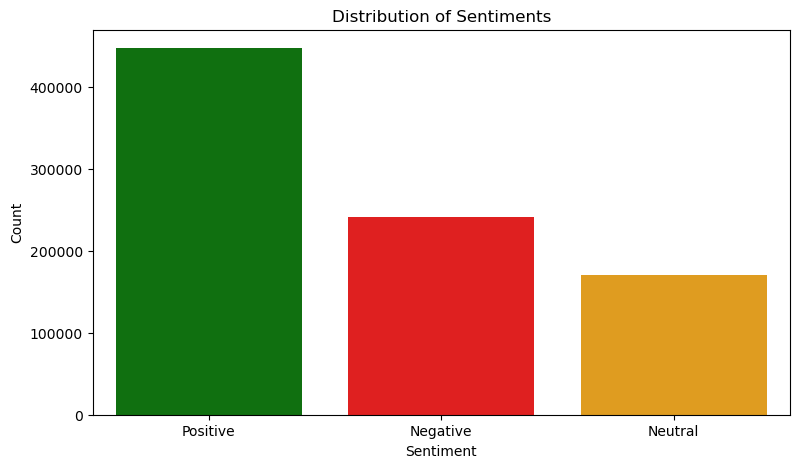

In [104]:
# Analyzing the distribution of sentiments
sentiment_distribution = dating_reviews_cleaned['Sentiment_label'].value_counts()

# Plotting the distribution of sentiments
plt.figure(figsize=(9, 5))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, palette={'Positive': 'green', 'Negative': 'red', 'Neutral': 'orange'})
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

De grafiek laat zien dat het grootste deel van de reviews positief is, gevolgd door een aanzienlijk aantal negatieve reviews. Neutrale reviews komen het minst voor. Dit wijst erop dat gebruikers vaker een uitgesproken mening hebben (positief of negatief) over de dating-app, en dat neutrale beoordelingen relatief minder voorkomen.

# Verdeling van Sentimenten per Beoordelingsscore

Deze grafiek laat de verdeling van sentimenten zien in relatie tot de beoordelingsscores (ratings) van reviews.

- Rating: De beoordelingsscore, variërend van 1 tot 5.
- Count: Het aantal reviews per combinatie van score en sentiment.


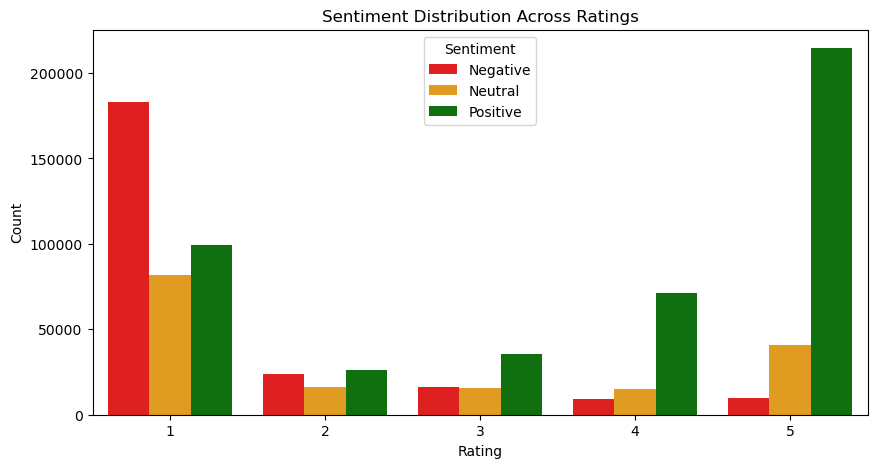

In [105]:
plt.figure(figsize=(10, 5))
sns.countplot(data=dating_reviews_cleaned, x='score', hue='Sentiment_label',  palette={'Positive': 'green', 'Negative': 'red', 'Neutral': 'orange'})
plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

De conclusie van deze grafiek is: 

- Reviews met een score van 1 bevatten voornamelijk negatieve sentimenten.
- Reviews met een score van 5 bevatten vrijwel uitsluitend positieve sentimenten.
- Bij tussenliggende scores (2, 3, 4) is er een mix van sentimenten, waarbij de verdeling meer varieert.

Deze grafiek toont dat sentiment sterk correleert met de beoordelingsscore: hoe hoger de score, hoe positiever het sentiment, en vice versa.

# Word Clouds

Deze visualisatie toont drie aparte word clouds, gegenereerd uit de inhoud van reviews met verschillende sentimenten:

- Positieve Reviews: Belangrijke woorden zoals "match," "good," en "easy" worden vaak gebruikt.
- Neutrale Reviews: Woorden als "work," "profile," en "time" zijn prominent aanwezig.
- Negatieve Reviews: Woorden zoals "banned," "fake," en "account" komen veel voor.

De grootte van een woord in de word cloud geeft aan hoe vaak het voorkomt in de tekst van de reviews.

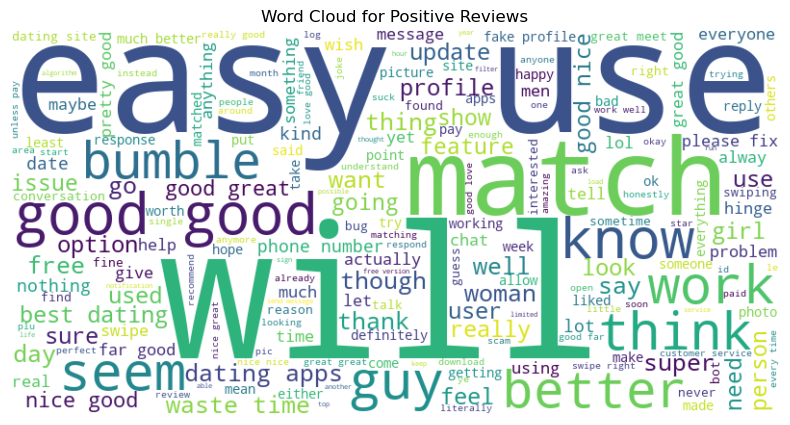

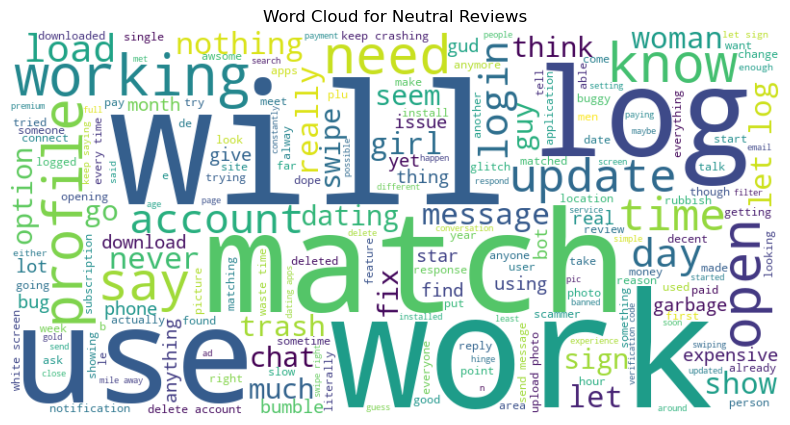

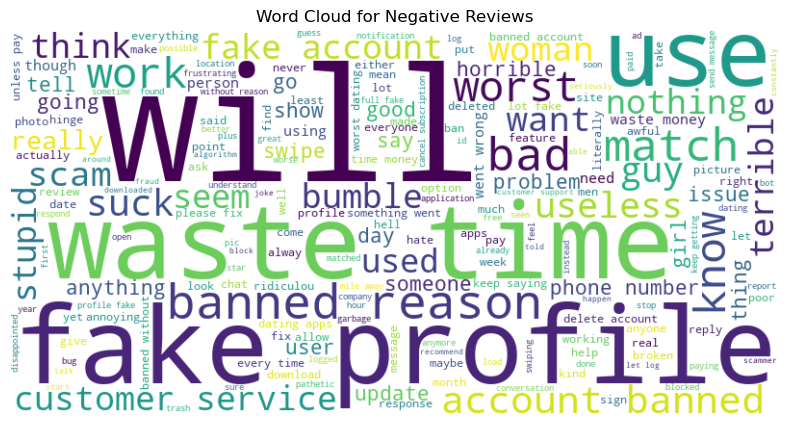

In [106]:
# Functie om word clouds te genereren voor elk sentiment
def generate_word_cloud(sentiment_label, data, sentiment_column='Sentiment_label', text_column='content'):
    # Filter the data by sentiment label
    filtered_text = ' '.join(data[data[sentiment_column] == sentiment_label][text_column].astype(str))

    # Genereer de word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white'
    ).generate(filtered_text)
    # Plot de word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment_label} Reviews')
    plt.axis('off')  # Turn off the axis
    plt.show()

# Genereer word clouds voor elk sentiment
for sentiment_label in ['Positive', 'Neutral', 'Negative']:
    generate_word_cloud(sentiment_label, dating_reviews_cleaned)


De word clouds tonen duidelijk de verschillen in taalgebruik per sentiment. Positieve reviews bevatten veel woorden die tevredenheid en gebruiksgemak suggereren, terwijl negatieve reviews vaak klachten en problemen benadrukken. Neutrale reviews hebben een mix van functionele en beschrijvende woorden, wat wijst op een minder uitgesproken mening. Dit kan helpen om inzicht te krijgen in hoe gebruikers hun ervaringen verwoorden afhankelijk van hun sentiment. Dit soort van visualisatie kan ook helpen met de preprocessing stap: tekstopschonen.

# Hoofddoel/ subvragen

In dit laatste onderdeel zullen we de vragen beantwoorden die aan het begin van de data-analyse zijn gesteld:

Hoofdvraag:
- Wat is het algemene tevredenheidspercentage van gebruikers over datingapps in het algemeen?

Subvragen:
- Wat zijn de gebruikelijke gedragingen en gevoelens die mensen hebben bij het gebruik van verschillende datingapps (zoals Tinder, Bumble en Hinge)?
- Hoeveel gebruikers vonden liefde of huwelijk via dating apps?

We beginnen met de subvragen en beantwoorden daarna de hoofdvraag. Om het tevredenheidspercentage te onderzoeken, maken we gebruik van Logistic Regression.

# Wat is het gevoel dat gebruikers hebben bij de verschillende apps? (Tinder, Bumble, Hinge)

De dataset wordt gegroepeerd op app-niveau (Tinder, Bumble, Hinge) en het relatieve aandeel van negatieve, neutrale en positieve sentimenten wordt berekend.

In [107]:
# Bereken het algemene sentiment voor elke app
app_sentiment = dating_reviews_cleaned.groupby('App')['Sentiment_label'].value_counts(normalize=True).unstack()
app_sentiment

Sentiment_label,Negative,Neutral,Positive
App,,,
Bumble,0.286411,0.165550,0.548039
Hinge,0.263360,0.151455,0.585184
Tinder,0.282117,0.211504,0.506379


Voor elke app wordt een cirkeldiagram gemaakt dat de verdeling van sentimenten (negatief, neutraal, positief) weergeeft

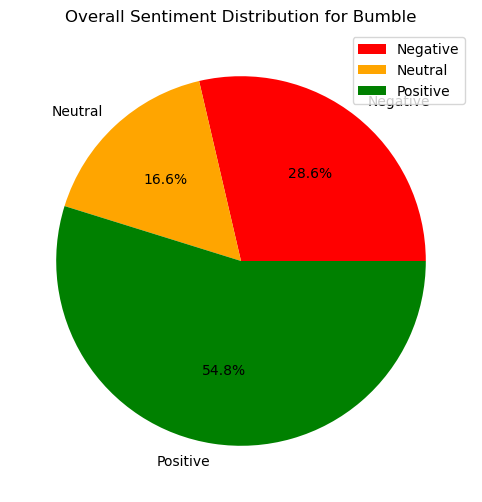

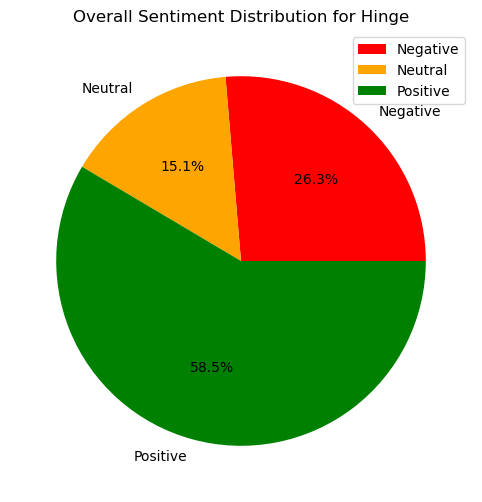

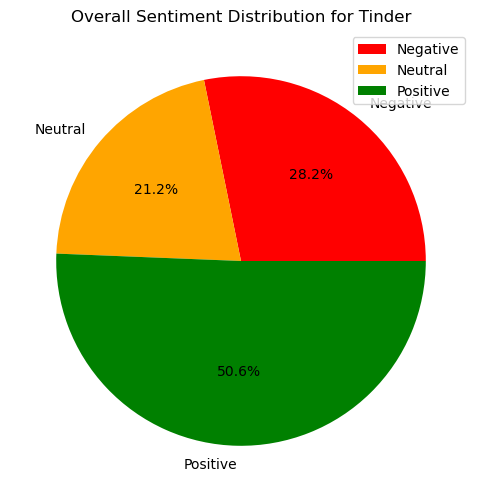

In [108]:
# Plot pie charts voor elk app
for app in app_sentiment.index:
    plt.figure(figsize=(8, 6))
    app_sentiment.loc[app].plot(
        kind='pie',
        autopct='%1.1f%%',
        colors=['red', 'orange', 'green'],  # Negative, Neutral, Positive
        title=f'Overall Sentiment Distribution for {app}',
        ylabel='',  # Remove default ylabel
        legend=True
    )
    plt.show()

De conclusie van de sentimentverdeling verschilt per app:

- Bumble heeft een relatief hoger percentage positieve sentimenten.
- Tinder en Hinge hebben een meer gemengde verdeling, met zowel positieve als neutrale en negatieve sentimenten.

Dit geeft inzicht in hoe gebruikers verschillende apps ervaren en waarderen.

# Hoeveel gebruikers vonden liefde of huwelijk via dating apps?

In deze vraag proberen we op basis van de opmerkingen te achterhalen of mensen liefde, dates of een huwelijk vinden via datingapps. We gaan dit proberen met behulp van de functie (found_relationship), die zoekt naar relatie-gerelateerde woorden en zinnen in de tekst van de reviews, zoals "met wife", "found love" en "found partner".

In [109]:
# Define a function to extract relationship-related phrases
def found_relationship(content):
    match = re.search(r"(met|found).{0,20}(husband|wife|love|partner)", content, flags=re.I)
    if match:
        return match.group(0)


De functie wordt toegepast op de kolom content om te identificeren of een review relatie-gerelateerde termen bevat.

In [110]:
dating_reviews_cleaned['found_relationship'] = dating_reviews_cleaned['content'].fillna("").apply(found_relationship)

Dan, reviews worden gefilterd om alleen die te tonen waar een relatie-gerelateerd resultaat is gevonden en de score ≥ 4 is, wat wijst op positieve ervaringen

In [111]:
dating_reviews_cleaned[(dating_reviews_cleaned['found_relationship'].notna()) & (dating_reviews_cleaned['score'] >= 4)]

,reviewId,userName,content,score,thumbsUpCount,Date,App,Year,Sentiment_score,Sentiment_label,found_relationship
456,e38ce68c-2071-43f5-9555-3b80e076d7de,A Google user,met nowwife year ago bought premium whatever c...,5,0,2024-11-17,Tinder,2024,1,Positive,met nowwife
1037,13fb639a-9a46-480d-a161-54b965ef1d9e,A Google user,thankyou much tinderi found love life herei ne...,5,0,2024-11-12,Tinder,2024,1,Positive,found love
1114,b91e064a-d956-41db-8363-26c8efdfdd12,A Google user,found partner,5,0,2024-11-12,Tinder,2024,0,Neutral,found partner
1373,32519a2c-a267-45fa-b1e7-5bd8171d4c4c,A Google user,tool make know want plan use figure go gave co...,4,1,2024-11-10,Tinder,2024,1,Positive,found love
1509,5cea4c58-a325-4004-84dd-dec8cda0d58c,A Google user,met wife,5,0,2024-11-09,Tinder,2024,0,Neutral,met wife
...,...,...,...,...,...,...,...,...,...,...,...
854900,9773b83c-dd5e-4fd8-b465-c9a7687739f9,A Google user,best think found life partner already lol,5,0,2018-10-24,Hinge,2018,1,Positive,found life partner
856095,58c9cc43-aae1-4c17-a9ff-f430f825a696,A Google user,met love life,5,0,2018-08-31,Hinge,2018,1,Positive,met love
856322,18176f11-b518-4104-8228-5a77e0ac6de4,A Google user,kind refreshing make actually fill profile som...,5,3,2018-08-18,Hinge,2018,1,Positive,mething talk partner
856538,fd0aacc7-b0eb-400e-a3cb-4685667e7f7e,A Google user,met lovely lady,5,0,2018-08-04,Hinge,2018,1,Positive,met love


Voordat we deze grafiek plotten, we gaan nog extra stappen doen. Deze code berekent percentages voor een taartdiagram door eerst het totale aantal reviews in de dataset te bepalen. Vervolgens telt het hoeveel gebruikers een relatie hebben gevonden met notna() en berekent het aantal zonder relatie door dit van het totaal af te trekken.

In [112]:
# Total number of reviews in the dataset
total_reviews = len(dating_reviews_cleaned)

# Count the rows where 'found_relationship' is not null
found_relationship_count = len(dating_reviews_cleaned[dating_reviews_cleaned['found_relationship'].notna()])

# Calculate the number of reviews where a relationship was not found
did_not_find_count = total_reviews - found_relationship_count

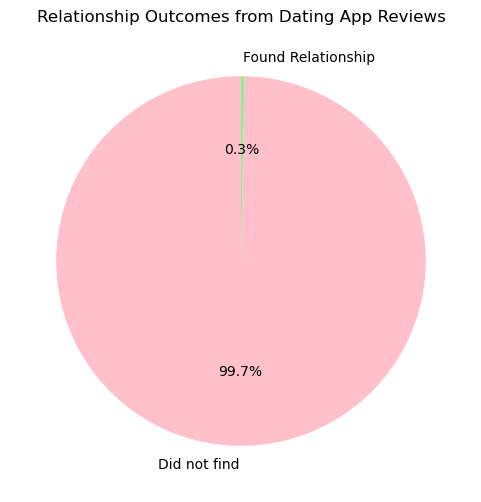

In [113]:
# Labels for the pie chart
labels = ['Did not find', 'Found Relationship']

# Values based on actual counts
values = [did_not_find_count, found_relationship_count]

# Colors for the chart
colors = ['pink', 'lightgreen']

# Pie chart creation
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Relationship Outcomes from Dating App Reviews')
plt.show()

De meeste gebruikers (99.7%) hebben geen relatie gevonden via dating-apps, terwijl 0.3% succesvol was in het vinden van een relatie. Dit is relatief te laag. Deze we kunnen concluderen dat niet te veel mensen hebben liefde in datings app of dating apps gebruikers willen niet in reviews van Google Play Store vertellen. Maar misschien in forums zoals Facebook, Reddit of X kunnen mesnsen over zijn persoonlijke verhalen meer over vertellen.

# Wat is het algemene tevredenheidspercentage van gebruikers over datingapps in het algemeen?

# Test- Training Data

We gaan onze data test & trainen voor deze deelvraag. Alleerst, de kolom content wordt gebruikt als inputfeatures (X), terwijl de kolom Sentiment_score wordt gebruikt als de doelvariabelen (y).

In [114]:
# Define features (X) and target (y)
X = dating_reviews_cleaned['content']  # Text reviews
y = dating_reviews_cleaned['Sentiment_score']  # Sentiments

Eventuele missende waarden in de kolom content worden gevuld met lege strings om fouten tijdens de verwerking te voorkomen

In [115]:
X.fillna("", inplace=True)

De dataset wordt opgesplitst in trainings- en testsets, waarbij 20% van de data wordt gereserveerd voor testen (test_size=0.2). Zo wordt de modeltraining en -evaluatie gescheiden gehouden.

In [116]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

De TfidfVectorizer zet de tekstdata om in numerieke features met behulp van de 5000 meest voorkomende woorden. De methode fit_transform wordt toegepast op de trainingsset, terwijl de testset wordt getransformeerd met dezelfde vectorizer.

In [117]:
# Vectorize text data
tfidf = TfidfVectorizer(max_features=5000)  # Limit to top 5000 words
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


Een logistische regressiemodel wordt getraind op de getransformeerde trainingsdata (X_train_tfidf) en de bijbehorende labels (y_train). De parameter max_iter=500 zorgt ervoor dat het model voldoende iteraties uitvoert om te convergeren.

In [118]:
model = LogisticRegression(max_iter=500)  # Increase to 500 or higher
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=500)

Nu het is tijd om de voorspellen van sentimenten doen: Het model gebruikt de geteste gegevens (X_test_tfidf) om voorspellingen te maken over de sentimenten (y_pred), gebaseerd op de getrainde logistische regressie.

In [119]:
# Predict sentiments
y_pred = model.predict(X_test_tfidf)

Het model wordt geëvalueerd door een classificatierapport te genereren, met metingen zoals precisie, recall, en F1-score. Deze statistieken laten zien hoe goed het model presteert op verschillende sentimentcategorieën (-1, 0, 1). De nauwkeurigheid wordt ook weergegeven, wat aangeeft dat het model ongeveer 91,6% correct is.

In [120]:
# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.88      0.87      0.87     48641
           0       0.94      0.93      0.94     34024
           1       0.93      0.93      0.93     89008

    accuracy                           0.92    171673
   macro avg       0.92      0.91      0.91    171673
weighted avg       0.92      0.92      0.92    171673

Accuracy: 0.9166904521969093


Hier wordt het getrainde model toegepast op de volledige dataset (dating_reviews_cleaned['content']) om sentimenten te voorspellen voor elke review.

In [121]:
# Predict sentiments for all reviews
all_predictions = model.predict(tfidf.transform(dating_reviews_cleaned['content']))

Na de valuatie van het model, we gaan de berekening van het Tevredenheidspercentage doen: Het aantal positieve sentimenten (positive_count) wordt geteld en gedeeld door het totale aantal reviews (total_reviews) om het percentage positieve sentimenten te berekenen.

In [122]:
# Calculate satisfaction percentage
positive_count = sum(all_predictions == 1)  # Count of Positive sentiments
total_reviews = len(all_predictions)  # Total number of reviews
satisfaction_percentage = (positive_count / total_reviews) * 100

Het resultaat laat zien dat ongeveer 52,3% van de reviews als positief wordt geclassificeerd.

In [123]:
print(f"Overall Satisfaction Percentage: {satisfaction_percentage:.1f}%")

Overall Satisfaction Percentage: 52.3%


We gaan nu het aantal voorspelde sentimenten (positief, negatief, neutral) uit de kolom Sentiment_label plotten: 

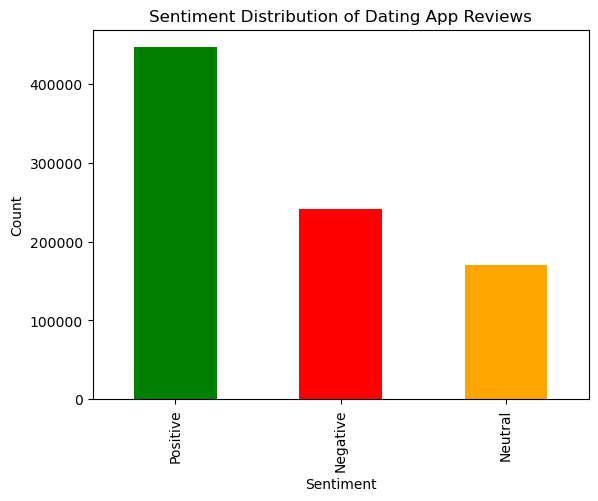

In [124]:
# Count the occurrences of each sentiment directly from the 'sentiment_score' column
sentiment_counts = dating_reviews_cleaned['Sentiment_label'].value_counts()

# Plot the sentiment distribution
sentiment_counts.plot(kind='bar', color=['green', 'red', 'orange'])
plt.title('Sentiment Distribution of Dating App Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

De grafiek toont de verdeling van voorspelde sentimenten op basis van het getrainde model. Het laat zien dat de meeste beoordelingen als positief worden geclassificeerd, gevolgd door een significant aantal negatieve en neutrale beoordelingen. Deze voorspellingen zijn gemaakt op basis van de sentimentanalyse van de tekstinhoud in de dataset. We kunnen nog steeds concluderen dat gebruikers nog een positief gevoel geven over dating apps.

Deze grafiek genereert een confusion matrix om de prestaties van het sentimentanalysemodel te evalueren. Het vergelijkt de echte labels (y_test) met de voorspellingen (y_pred) en toont een visuele weergave van correcte en foutieve classificaties, verdeeld over positieve, neutrale en negatieve sentimenten.

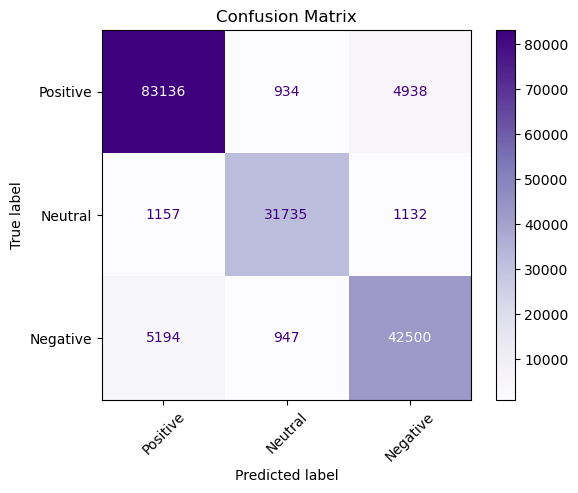

In [125]:
true_labels = y_test
predicted_labels = y_pred

# Use y_test as true labels and y_pred as predicted labels
cm = confusion_matrix(y_test, y_pred, labels=[1, 0, -1])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive', 'Neutral', 'Negative'])
disp.plot(cmap='Purples', xticks_rotation=45)
plt.title('Confusion Matrix')
plt.show()

Deze visualisatie is een confusion matrix die de prestaties van het voorspellingsmodel weergeeft. De matrix toont het aantal juiste en verkeerde classificaties voor elk sentiment: positief, neutraal en negatief. De rijen vertegenwoordigen de werkelijke labels, terwijl de kolommen de voorspelde labels weergeven Dus we kunnen concluderen dat het model goed presteert bij het voorspellen van sentimenten, met hoge nauwkeurigheid voor positieve, neutrale en negatieve classificaties

# 📃Bronnen

Sentiment Analysis: https://blog.apify.com/sentiment-analysis-python/

Sentiment Analysis App Reviews:  https://thecleverprogrammer.com/2023/12/04/app-reviews-sentiment-analysis-using-python/#google_vignette

https://github.com/PacktPublishing/Hands-on-Exploratory-Data-Analysis-with-Python/blob/master/Chapter%201/Numpy_and_Pandas.ipynb

https://github.com/kailenroa/Sleep-Efficiency-Project/blob/main/Dashboard%20Sleep%20Efficiency%20.ipynb

https://medium.com/@robdelacruz/sentiment-analysis-using-natural-language-processing-nlp-3c12b77a73ec
https://www.analyticsvidhya.com/blog/2021/06/nlp-sentiment-analysis/